In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns


In [10]:
housing = pd.DataFrame(pd.read_csv(r"C:\Users\Nalamati Yasaswini\Documents\Bharat Intern\Housing.csv"))

In [11]:
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
housing.shape

(545, 13)

In [13]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [15]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

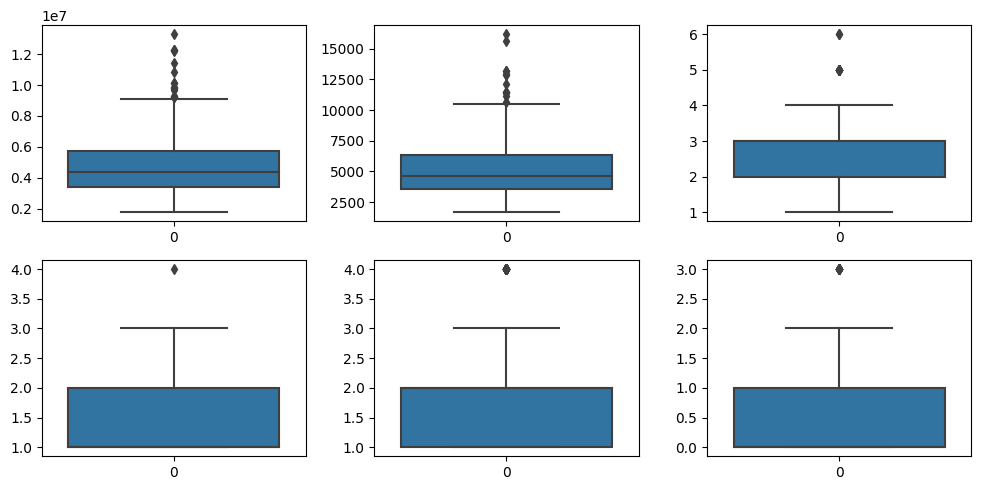

In [16]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])
plt.tight_layout()

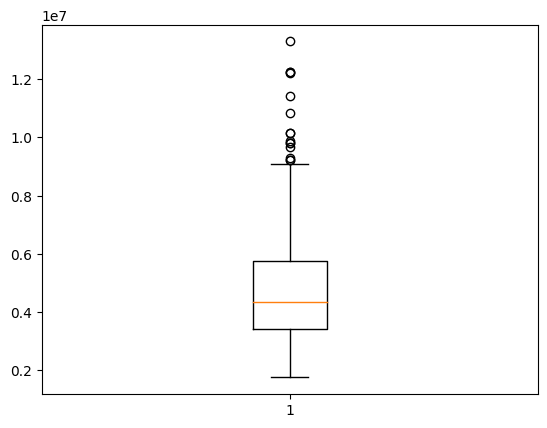

In [17]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

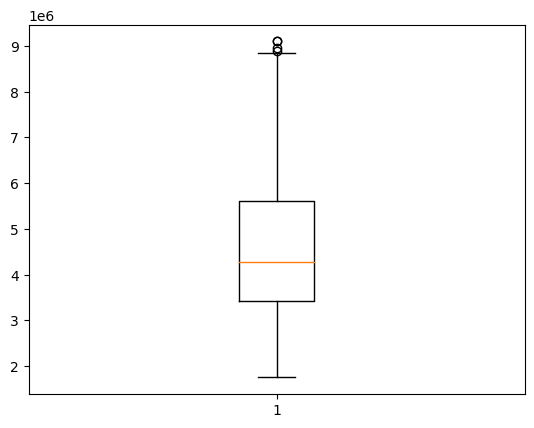

In [18]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

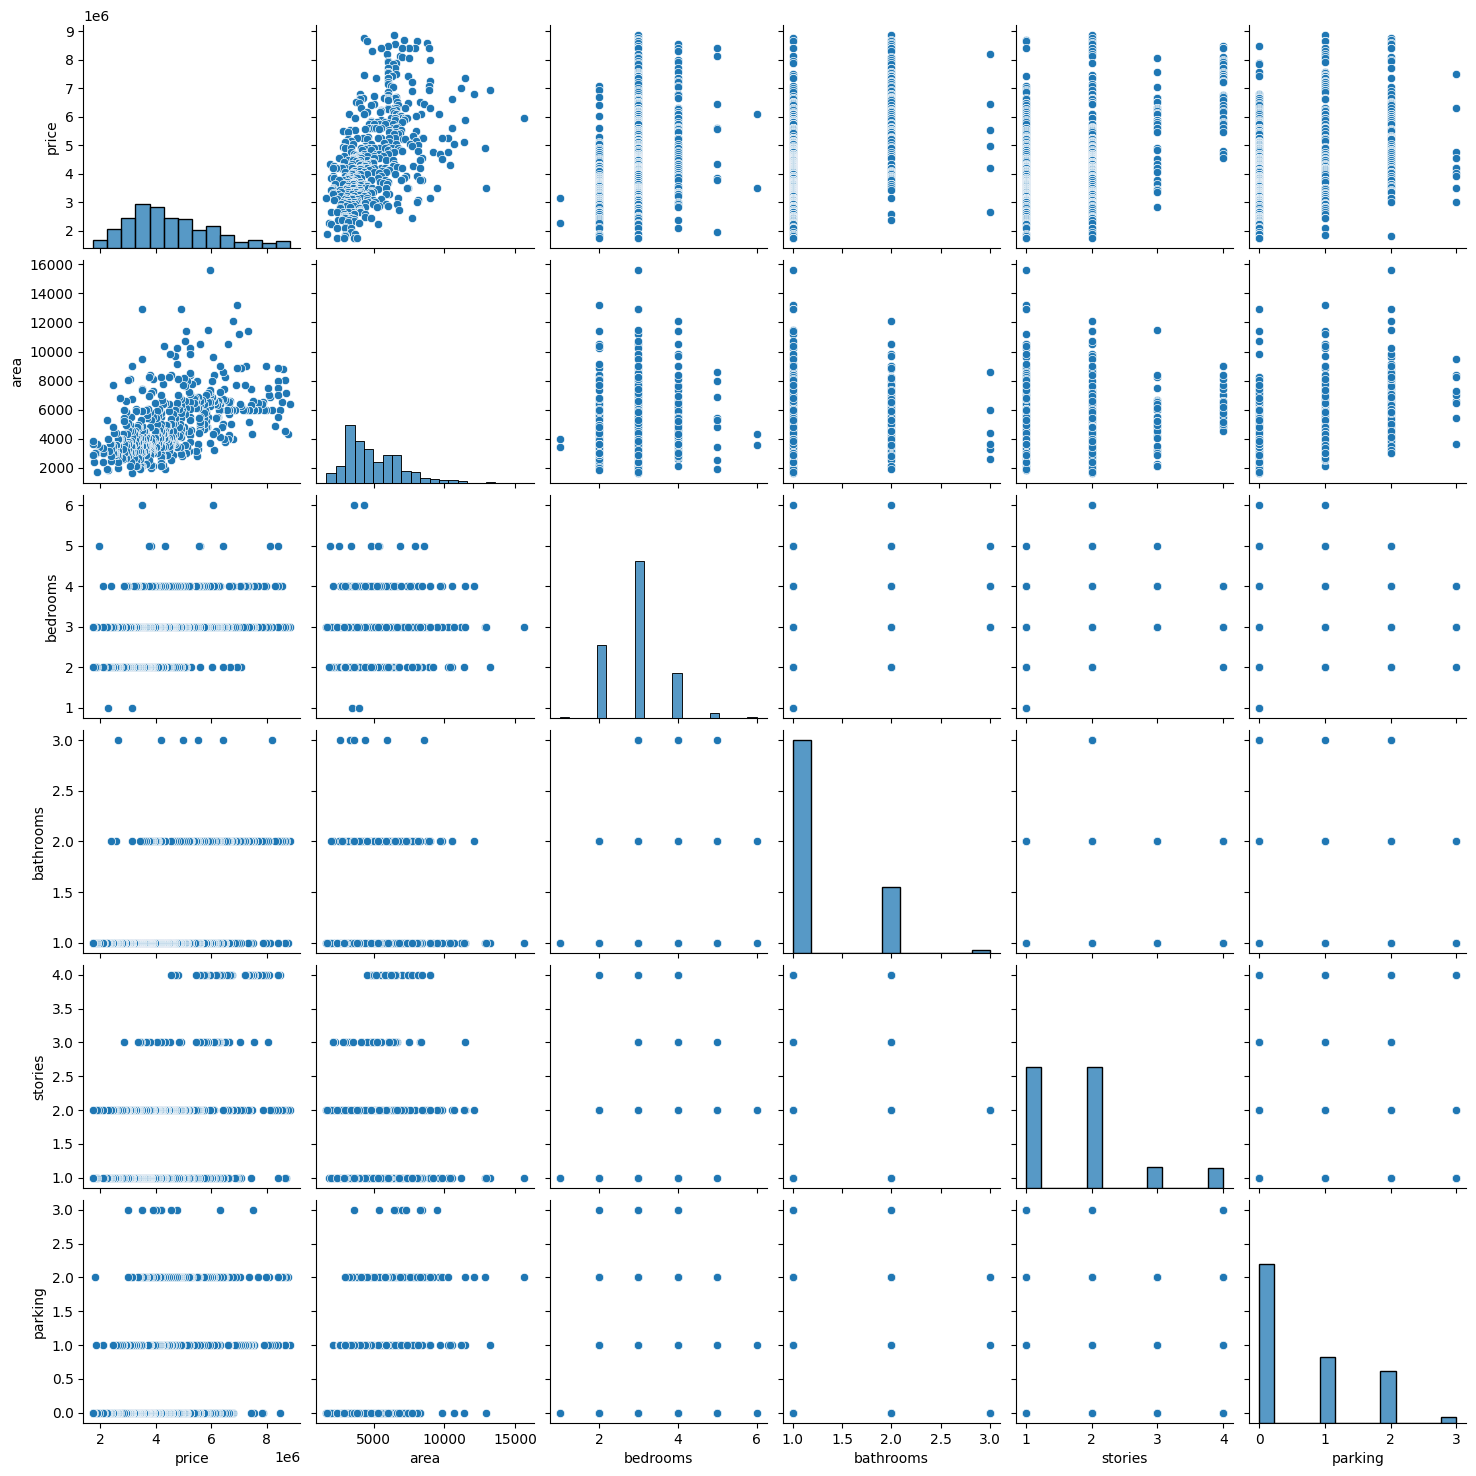

In [25]:
sns.pairplot(housing)
plt.show()

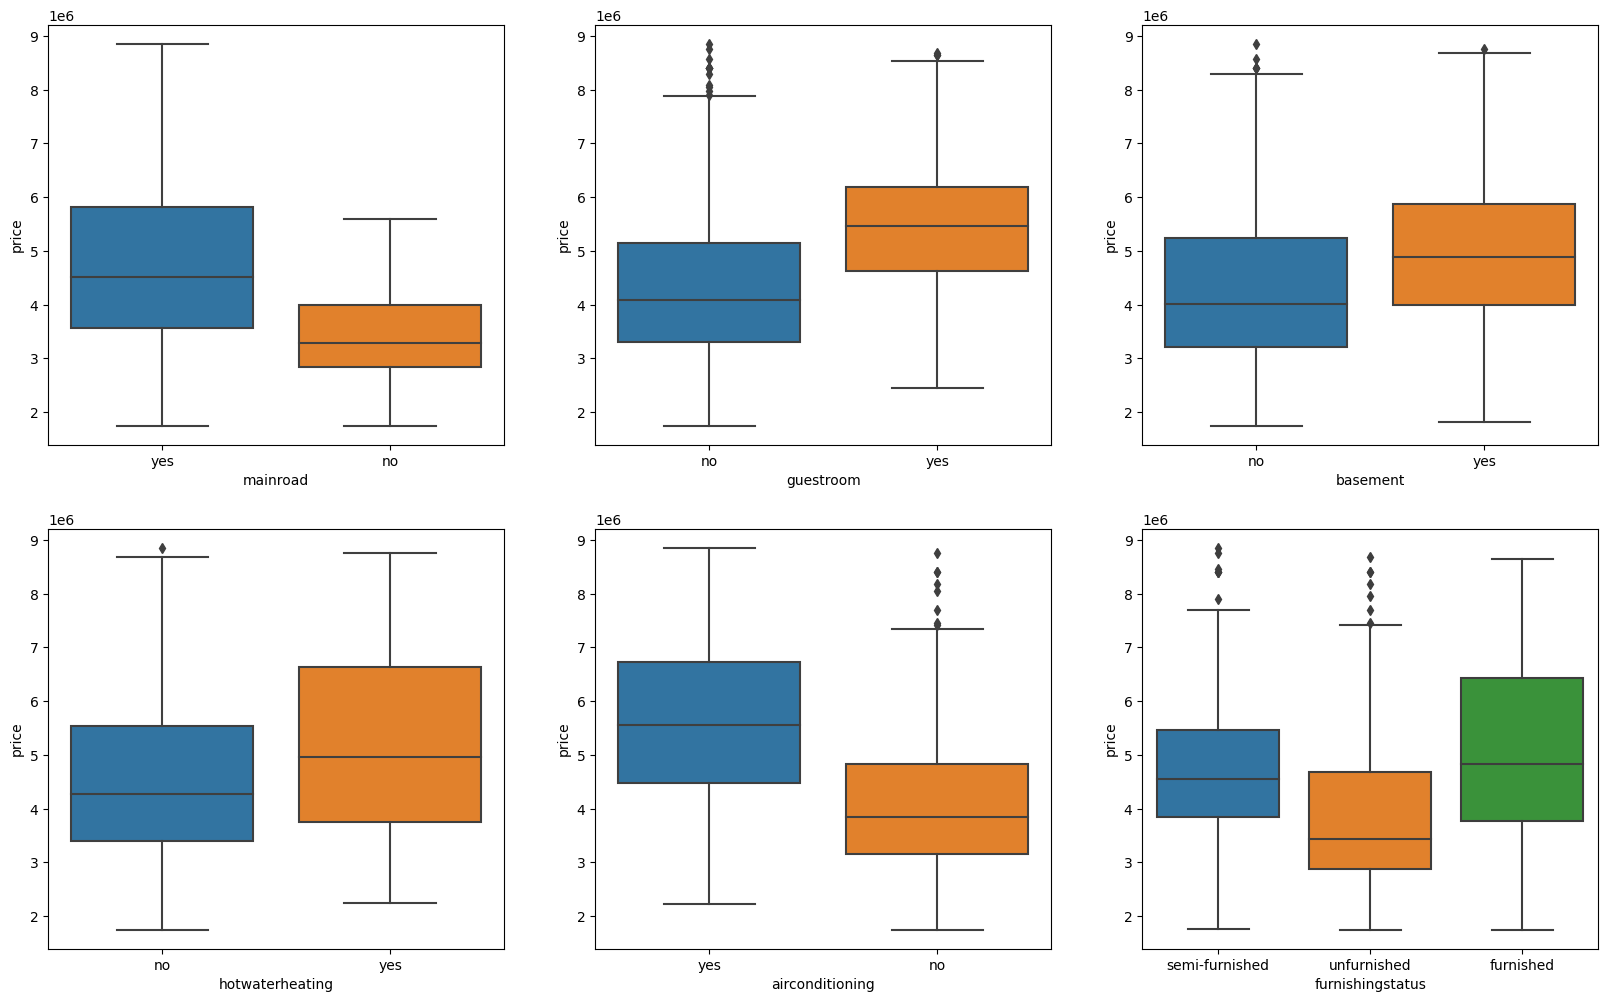

In [26]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()


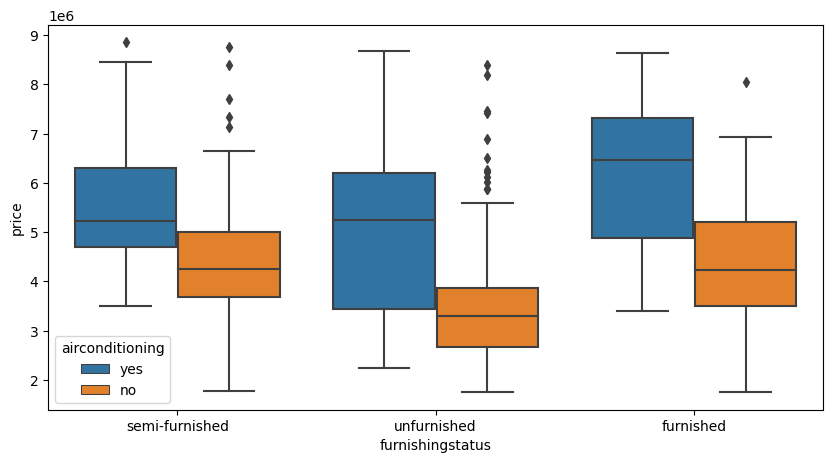

In [27]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [28]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [29]:

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished


In [30]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housing['furnishingstatus'])

In [31]:
# Check what the dataset 'status' looks like
status.head()


,furnished,semi-furnished,unfurnished
19,False,True,False
20,False,True,False
21,False,False,True
22,True,False,False
23,True,False,False


In [32]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [33]:
# Add the results to the original housing dataframe

housing = pd.concat([housing, status], axis = 1)

In [34]:
# Now let's see the head of our dataframe.

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,True,False
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished,True,False
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished,False,True
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished,False,False
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished,False,False


In [35]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [36]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,True,False
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,False,True
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,False,False
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,False,False


In [37]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
115,0.600985,0.455197,0.4,0.0,0.000000,1,1,1,0,1,0.666667,1,True,False
52,0.788177,0.311828,0.6,0.5,1.000000,1,1,0,0,1,0.333333,0,False,False
469,0.177340,0.211470,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,False,False
148,0.541872,0.337634,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,True,False
400,0.246305,0.133477,0.2,0.0,0.000000,1,0,0,0,0,0.333333,1,False,True


In [41]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,0.394963,0.247582,0.381522,0.129076,0.253623,0.853261,0.171196,0.355978,0.038043,0.290761,0.217391,0.211957
std,0.214534,0.154174,0.143471,0.237028,0.294750,0.354327,0.377193,0.479461,0.191562,0.454732,0.278114,0.409251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240148,0.133907,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.352217,0.204659,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.541872,0.337634,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


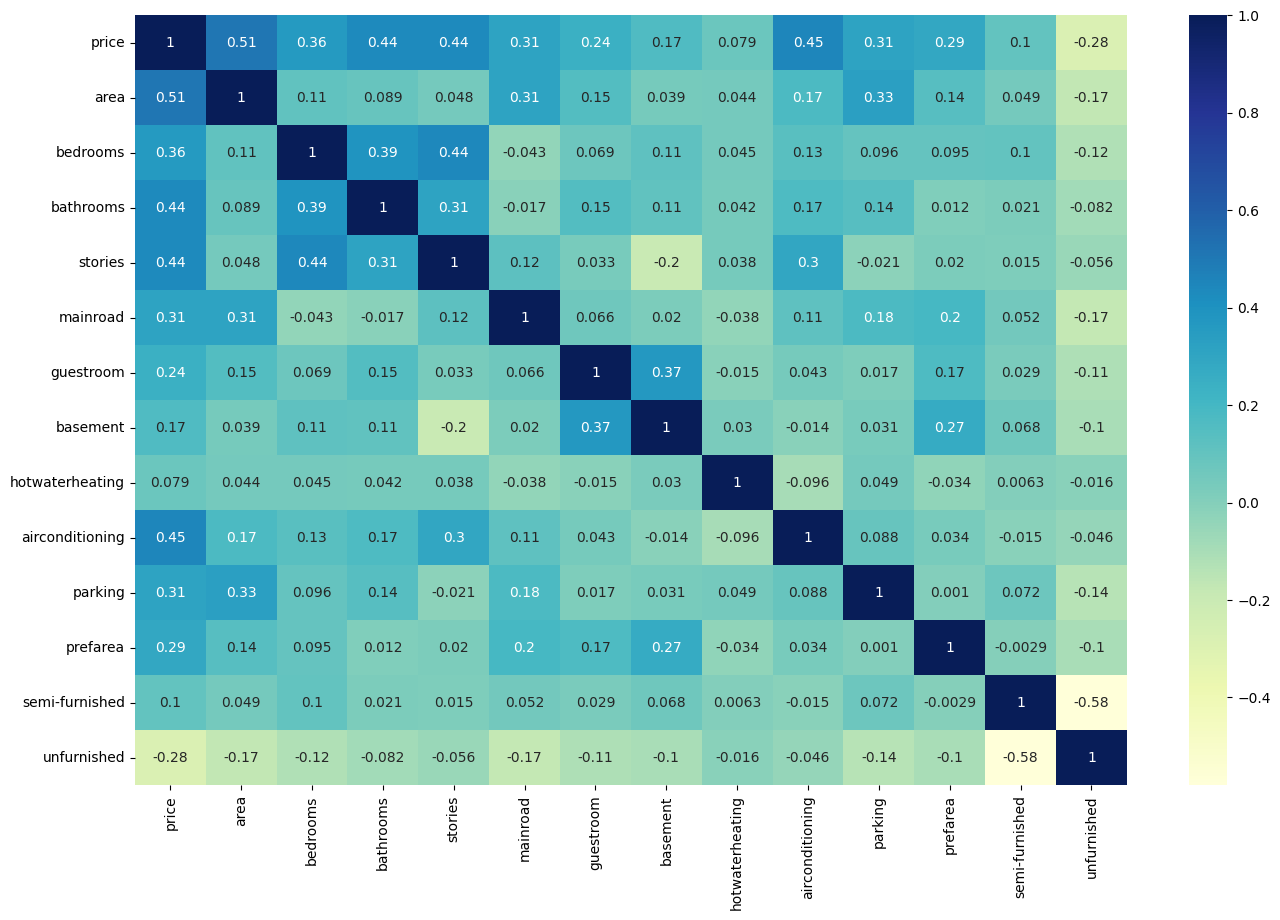

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [43]:
y_train = df_train.pop('price')
X_train = df_train

In [44]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [55]:

rfe = RFE(lm, n_features_to_select=6)  # running RFE
rfe = rfe.fit(X_train, y_train)




In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 4),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 7),
 ('basement', False, 6),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [57]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [58]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [59]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [62]:
pip install statsmodels


     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB 640.0 kB/s eta 0:00:15
     ---------------------------------------- 0.1/9.2 MB 1.1 MB/s eta 0:00:09
     ---------------------------------------- 0.1/9.2 MB 762.6 kB/s eta 0:00:12
     ---------------------------------------- 0.1/9.2 MB 762.6 kB/s eta 0:00:12
      --------------------------------------- 0.1/9.2 MB 708.1 kB/s eta 0:00:13
      --------------------------------------- 0.1/9.2 MB 708.1 kB/s eta 0:00:13
      --------------------------------------- 0.2/9.2 MB 620.6 kB/s eta 0:00:15
     - -------------------------------------- 0.2/9.2 MB 654.2 kB/s eta 0:00:14
     - -------------------------------------- 0.3/9.2 MB 654.2 kB/s eta 0:00:14
     - -------------------------------------- 0.3/9.2 MB 654.2 kB/s eta 0:00:14
     - -------------------------------------- 0.4/9.2 MB 798.7 kB/s eta 0:00:11
     - -------------------------------------- 0.4/9

In [63]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [64]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [65]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     100.2
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           8.80e-74
Time:                        22:39:29   Log-Likelihood:                 225.22
No. Observations:                 368   AIC:                            -436.4
Df Residuals:                     361   BIC:                            -409.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1126      0.015     

In [66]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.41
3,stories,1.20
1,area,1.18
5,parking,1.15
2,bathrooms,1.14
4,airconditioning,1.13
6,prefarea,1.02


In [68]:
y_train_price = lm.predict(X_train_rfe)

In [69]:
res = (y_train_price - y_train)

In [70]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

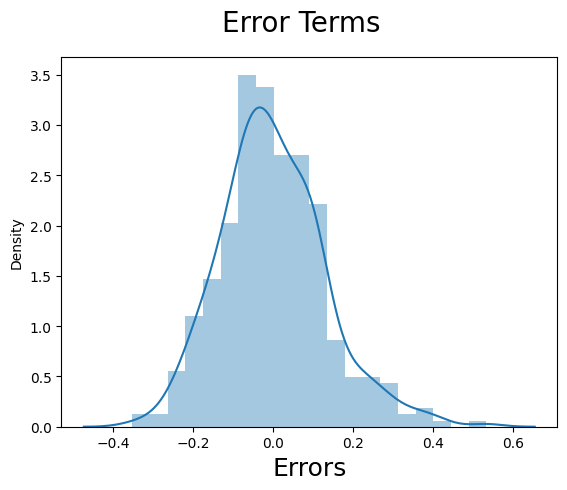

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

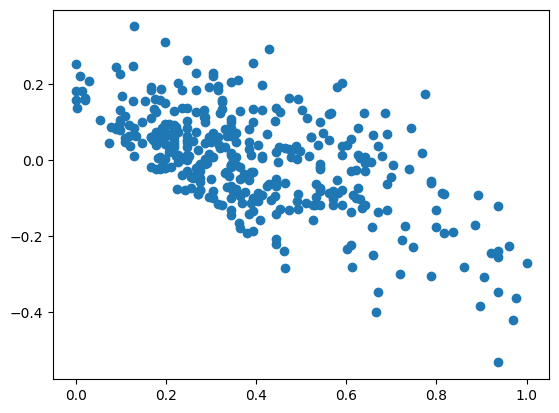

In [72]:
plt.scatter(y_train,res)
plt.show()

In [73]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']


In [74]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [75]:
y_test = df_test.pop('price')
X_test = df_test

In [76]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [77]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [78]:
# Making predictions
y_pred = lm.predict(X_test_rfe)


In [79]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.4268600075400102

Text(0, 0.5, 'y_pred')

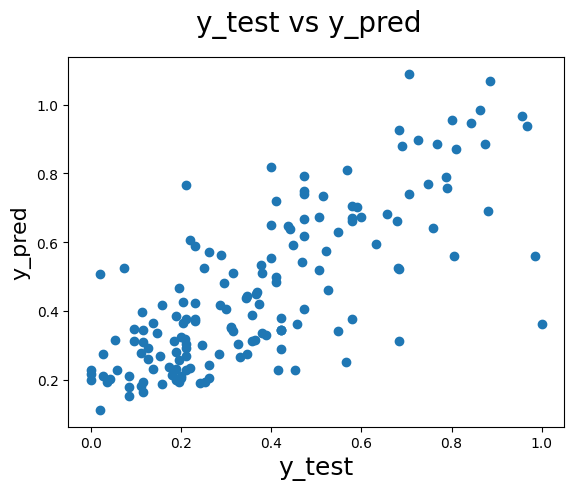

In [80]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label